In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 9

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "d:\Projects\Python\Lib\asyncio\base_events.py", line 641, in run_forever

  File "d:\Projects\Python\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "d:\Projects\Python\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Adithyan S\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Adithyan S\AppData\Local\Temp\ipykernel_11016\2889966517.py", line 1, in <module>

  File "d:\Projects\Python\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\Projects\Python\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "d:\Projects\Python\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "d:\Projects\Python\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "d:\Projects\Python\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "d:\Projects\Python\Lib\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "d:\Projects\Python\Lib\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "d:\Projects\Python\Lib\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "d:\Projects\Python\Lib\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "d:\Projects\Python\Lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "d:\Projects\Python\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "d:\Projects\Python\Lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "d:\Projects\Python\Lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "d:\Projects\Python\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 8 which is outside the valid range of [0, 8).  Label values: 7 4 5 6 2 4 8 8 2 4 7 8 4 7 8 6 8 1 4 7 0 4 1 5 8 4 8 6 7 6 2 7 6 1 8 1 2 5 8 3 8 8 4 5 4 4 1 2 8 7 7 8 7 5 4 7 2 7 7 8 6 1 5 1 0 8 2 8 5 8 1 0 0 7 5 1 5 1 0 0 8 1 4 1 0 7 0 1 7 4 5 4 8 1 8 8 6 1 7 1 4 5 1 0 1 2 7 8 7 1 8 4 6 1 2 8 8 8 1 5 8 0 8 8 1 8 4 8
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1399]

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8989 - loss: 0.3477


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[4.8570588e-02 4.5523387e-03 1.1163565e-05 6.2529184e-02 8.7530518e-01
 9.0108505e-03 6.8375655e-08 2.0579404e-05]
4


# Confusion matrix

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


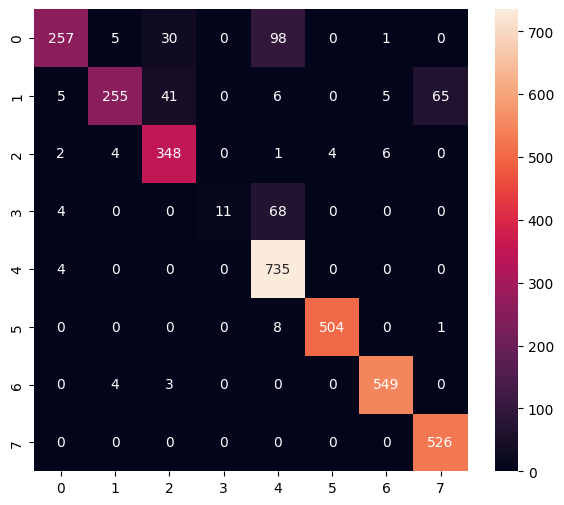

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.66      0.78       391
           1       0.95      0.68      0.79       377
           2       0.82      0.95      0.88       365
           3       1.00      0.13      0.23        83
           4       0.80      0.99      0.89       739
           5       0.99      0.98      0.99       513
           6       0.98      0.99      0.98       556
           7       0.89      1.00      0.94       526

    accuracy                           0.90      3550
   macro avg       0.92      0.80      0.81      3550
weighted avg       0.91      0.90      0.89      3550



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ADITHY~1\AppData\Local\Temp\tmpjdiealbe\assets


INFO:tensorflow:Assets written to: C:\Users\ADITHY~1\AppData\Local\Temp\tmpjdiealbe\assets


Saved artifact at 'C:\Users\ADITHY~1\AppData\Local\Temp\tmpjdiealbe'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  1973350588752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1973350592400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1973350591248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1973350592976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1973350591824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1973350591440: TensorSpec(shape=(), dtype=tf.resource, name=None)


6712

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.8570588e-02 4.5523359e-03 1.1163565e-05 6.2529206e-02 8.7530518e-01
 9.0108542e-03 6.8375648e-08 2.0579442e-05]
4
